In [1]:
%matplotlib inline
import matplotlib as mpl
import numpy as np
from scipy.special import comb
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import sys
sys.path.insert(0, 'src')
import common

# Сплайновые поверхности

### Небольшое введение

В этом конспекте будут рассматриваться поверхности, и зайдет разговор о гладкости какой-либо поверхности. Вспомним, что это означает. Плоскость, заданная уравнением 
$\begin{bmatrix}
    x\left(u,v\right) \\
    y\left(y,v\right) \\
    z\left(u,v\right)
\end{bmatrix} = \vec{R}\left(u,v\right)$ на связном множестве $G$ принадлежит множеству $C^k(G)$ (является $C^k$-гладкой), если функция $\vec{R}\left(u,v\right)$ является $C^k$-гладкой на множестве $G$, то есть имеет непрерывную производную до порядка $k$ включительно (если говорится о множестве $C^0(G)$, то непрерывной должна быть сама функция).

### Задача

Необходимо по заданному множеству вершин построить гладкую поверхность, которая, плавно изменяясь, проходила бы вблизи этих вершин.

***Примечание*** *для понимания дальнейшего материала необходимо сначала ознакомиться с базовой теорией о сплайнах и кривых Безье.*

Важную роль в решении задачи играет многогранная поверхность, вершины которой совпадают с точками из заданного множества. Назовем эту поверхность **опорной**. Она примерно показывает, как будет выглядеть искомая поверхность. Построенный на этих точках граф с ребрами, соответствующими граням в опорной поверхности, назовем **опорным графом**. Двойная индексация массива множества вершин $\{P_{ij}\} $ будет показывывать реберную связь в опорном графе - смежные по индексам вершины имеют ребро, остальные нет.

В общем виде параметрическое уравнение искомой поверхности будет выглядеть так: 
$\vec{R}\left(u,v\right)=\sum\limits_{i=0}^n \sum\limits_{j=0}^m a_i\left(u\right) b_j\left(v\right) \vec{P_{ij}}$, где $a_i\left(u\right)$ и $b_j\left(v\right)$ $-$ некоторые функциональные коэффициенты.

Если количество вершин в множестве $P$ велико, то найти коэффициенты $a_i\left(u\right)$ и $b_i\left(v\right)$ достаточно тяжело, а даже если и найти их, то может получиться так (зачастую так и бывает), что поверхность с полученными коэффициентами будет сильно отклоняться от опорной поверхности или осциллировать.

Для решения поставленной задачи можно разбить множество $P$ на подмножества, для каждого подмножества построить по какой-нибудь простой схеме поверхность (назовем ее **элементарной**), и, соединив все полученные поверхности, найти искомую. Такие составные поверхности называются **сплайновыми**. При этом в каждом подмножестве в качестве коэффициентов $c_{ij}\left(u,v\right) = a_i\left(u\right) b_i\left(v\right)$ используются многочлены одной степени.

Для коэффициентов $a_i\left(u\right)$ и $b_i\left(v\right)$ обычно используются коэффициенты невысоких степеней, второй или третьей. Таким образом, все, что необходимо сделать, чтобы решить задачу $-$ это построить элементарные поверхности для заданного множества, а потом их соединить.

## Поверхности Безье

### Определение


По заданному множеству вершин $\{P_{ij}\}, 0 \le i \le n, 0 \le j \le m$ **поверхность Безье порядка $n \times m$** определяется следующим уравнением: $\vec{R}\left(u,v\right)=\sum\limits_{i=0}^n \sum\limits_{j=0}^m B_i^n\left(u\right)B_j^m\left(v\right)\vec{P_{ij}}, 0 \le u, v \le 1$ , где $B^n_i\left(u\right)=\binom{n}{i}u^i\left(1-u\right)^{n-i}$ $-$ многочлен Бернштейна. В случае, когда область изменения параметров $u$ и $v$ $-$ произвольный прямоугольник вида $R=\{\left(u,v\right)|a \le u \le b, c \le v \le d\}$, уравнение принимает следующий вид: $\vec{R}\left(u,v\right)=\sum\limits_{i=0}^n \sum\limits_{j=0}^m B_i^n\left(\dfrac{u - a}{b - a}\right)B_j^m\left(\dfrac{v - c}{d - c}\right)\vec{P_{ij}}$

### Матричная запись уравнения Безье
$\begin{bmatrix}
    x\left(u,v\right) \\
    y\left(y,v\right) \\
    z\left(u,v\right)
\end{bmatrix} 
= 
\left(u^0 \dots u^n\right) M^T
\begin{bmatrix}
    P_{00} & \dots & P_{0m} \\
    \dots & \dots & \dots \\
    P_{n0} & \dots & P_{nm}
\end{bmatrix} N 
\begin{bmatrix}
    v^0 \\
    \dots \\
    v^m
\end{bmatrix}$, где $M=\left(\mu_{ij}\right), N=\left(\nu_{ij}\right)$ $-$ квадратные матрицы порядка $n$ и $m$ соответственно. $\mu_{ij}=\left(-1\right)^{j-i}\binom{n}{j}\binom{j}{i}, \nu_{ij}=\left(-1\right)^{j-i}\binom{n}{i}\binom{j}{i}$.

### Бикубическая поверхность Безье

Данный вид поверхностей наиболее часто используется в качестве элементарной поверхности. Поверхность Безье называется **бикубической**, если $n = m = 3$. Для определения бикубической поверхности Безье требуется 16 точек (матрица $4\times4$). Используя формулу для коэффициентов $\mu_{ij}$ и $\nu_{ij}$ можно видеть, что $N=M=
\begin{bmatrix}
    1 & -3 & 3 & 1 \\
    0 & 3 & -6 & 3 \\
    0 & 0 & 3 & -3 \\
    0 & 0 & 0 & 1
\end{bmatrix}$. Данная матрица называется базисной матрицей бикубической поверхности Безье.

### Некоторые свойства поверхностей Безье


#### Свойства полинома Бернштейна
* $\forall v, u: \sum\limits_{i=0}^n \sum\limits_{j=0}^m B_i^n\left(u\right)B_j^m\left(v\right)=\sum\limits_{i=0}^n B_i^n\left(u\right) \sum\limits_{j=0}^m B_j^m\left(v\right) = \sum\limits_{i=0}^n B_i^n\left(u\right) =1$, по свойствам, доказанным в конспекте кривой Безье
* $B_i^n\left(0\right)=\delta_0^i, B_i^n\left(1\right)=\delta_n^i$, где $\delta - $символ Кронекера.

#### Свойства поверхностей Безье
* Является гладкой поверхностью, так как задается полиномом от двух переменных. 
* Граничные кривые поверхности есть суть кривые Безье. Взяв $v=const=0$ получаем $\vec{R}(u,0)=\sum\limits_{i=0}^n B_i^n(u) \sum\limits_{j=0}^m B_j^m\left(0\right)\vec{P_{ij}}$. Из свойства полинома Бернштейна получаем $\vec{R}\left(u,0\right)=\sum\limits_{i=0}^n B_i^n\left(u\right) \vec{P_{i0}}$, что является уравнением кривой Безье с опорным массивом $P_{00}, \dots,P_{n0}$.

* Угловые вершины $P_{00}, P_{n0}, P_{0m}, P_{nm}$ лежат на поверхности Безье. $R\left(0,0\right)=P_{00}, R\left(1,0\right)=P_{n0}, R\left(0,1\right)=P_{0m}, R\left(1,1\right)=P_{nm}$
* Производные в угловых вершинах (вычисление производных представлено ниже):

$\vec{R_u}\left(0,0\right)=n\left(\vec{P}_{10}-\vec{P}_{00}\right)$,

$\vec{R_v}\left(0,0\right)=m\left(\vec{P}_{01}-\vec{P}_{00}\right)$,
то есть в угловых опорных точках поверхность касается звеньев опорного графа.
* Лежит в выпуклой оболочке, порожденной массивом $\vec{P}$.
* Если все вершины массива $\vec{P}$ лежат в одной плоскости, то и сама поверхность Безье лежит в этой плоскости
* Степень функциональных коэффициентов (многочленов Бернштейна) зависит напрямую от количества вершин в массиве.
* При изменении любой вершины возникает необходимость полного пересчета параметрических уравнений поверхности Безье

### Составные поверхности Безье

Рассмотрим составные бикубические поверхности Безье. **Составная бикубическая поверхность Безье** $-$ это непрерывная (но не обязательно гладкая) поверхность, являющаяся объединением элементарных бикубических поверхностей Безье. 



Одним из преимуществ по отношению к обычной поверхности Безье является то, что при изменении какой-нибудь вершины придется пересчитывать только одну бикубическую поверхность. Также составная поверхность будет повторять лучше опорную поверхность, так как функциональные коэффициенты будут третьей степени. Существенным недостатком составных поверхностей является то, что в общем случае она не является гладкой, а только непрерывной.


Пусть 

$\vec{R}=\vec{R^{\left(1\right)}}\left(u,v\right)$

$\vec{R}=\vec{R^{\left(2\right)}}\left(u,v\right)$

$-$ радиус-векторы двух элементарных поверхностей Безье, соответственно $S^{\left(1\right)}$ и $S^{\left(2\right)}$, порожденные массивами $\vec{P^{\left(1\right)}}$ и $\vec{P^{\left(2\right)}}$, притом $\vec{P^{\left(2\right)}_{nj}}=\vec{P^{\left(2\right)}_{0j}}$, то есть поверхности $S^{\left(1\right)}$ и $S^{\left(2\right)}$ имеют общую граничную кривую $\vec{R^{\left(1\right)}}\left(1,v\right)=\vec{R^{\left(2\right)}}\left(0,v\right)$. Так как граничные кривые обеих поверхностей имеют один и тот же опорный массив (массив граничных точек - $P_{i0}, P_{im}, P_{0j}, P_{nj}$, что следует из свойств), они совпадают. Значит, составная поверхность непрерывна. Но интересует условие, при котором составная поверхность будет не только непрерывной, но и гладкой.

### Условие гладкости составных поверхностей Безье

**Лемма (производная уравнения поверхности Безье)**
> $\vec{R}\left(u,v\right)  -$ поверхность Безье. 

> Тогда $\vec{R_u}\left(u,v\right)=n\sum\limits_{i=0}^{n-1}\sum\limits_{j=0}^{m}(\vec{P}_{i+1,j}-\vec{P}_{i,j})B_i^{n-1}(u)B_j^m(v)$ ,
> $\vec{R_v}(u,v)=m\sum\limits_{i=0}^{n}\sum\limits_{j=0}^{m - 1}(\vec{P}_{i,j+1}-\vec{P}_{i,j})B_i^{n}\left(u\right)B_j^{m-1}(v)$ 


$\triangleright$
<div style="padding-left:40px">
$\vec{R_u}\left(u,v\right)=\left(\sum\limits_{i=0}^n \sum\limits_{j=0}^m B_i^n\left(u\right)B_j^m\left(v\right)\vec{P_{ij}}\right)'_u=\sum\limits_{i=0}^n \sum\limits_{j=0}^m B_i^n\left(u\right)'B_j^m\left(v\right)\vec{P_{ij}}$,

Для начала выпишем некоторые преобразования сочетаний:
$\binom{n}{i}=\binom{n-1}{i-1}\dfrac{n}{i}$ , $\binom{n}{i}=\binom{n-i}{i}\dfrac{n}{n-i}$(*)

Расммотрим производную многочлена Бернштейна
$B^n_i\left(u\right)'=\left(\binom{n}{i}u^i\left(1-u\right)^{n-i}\right)'=\binom{n}{i}\left(iu^{i-1}\left(1-u\right)^{n-i}-\left(n-i\right)u^i\left(1-u\right)^{n-i-1}\right)=\left(*\right)=\binom{n-1}{i-1}\dfrac{n}{i}iu^{i-1}\left(1-u\right)^{n-i}-\binom{n-1}{i}\dfrac{n}{n-i}\left(n-i\right)u^i\left(1-u\right)^{n-i-1}=n\left(B^{n-1}_{i-1}-B^{n-1}_i\right)$

$\sum\limits_{i=0}^n \sum\limits_{j=0}^m B_i^n\left(u\right)'B_j^m\left(v\right)\vec{P_{ij}}=n\sum\limits_{i=0}^{n-1} \sum\limits_{j=0}^m \left(B^{n-1}_{i-1}-B^{n-1}_i\right)B_j^m\left(v\right)\vec{P_{ij}}=n\sum\limits_{i=0}^{n-1}\left(B^{n-1}_{i-1}-B^{n-1}_i\right)\sum\limits_{j=0}^mB_j^m\left(v\right)\vec{P_{ij}}=n\left(-B^{n-1}_0\sum\limits_0^mB^m_j\vec{P_{0j}}+B^{n-1}_0\sum\limits_0^{m}B^m_j\vec{P_{1j}}-B^{n-1}_1\sum\limits_0^{m}B^m_j\vec{P_{1j}} + B^{n-1}_1\sum\limits_0^{m}B^m_j\vec{P_{2j}} \dots + B^{n-1}_{n-1}\sum\limits_0^mB^m_j\vec{P_{nj}}\right)=n\sum\limits_{i=0}^{n-1}\sum\limits_{j=0}^{m}\left(\vec{P}_{i+1,j}-\vec{P}_{i,j}\right)B_i^{n-1}\left(u\right)B_j^\left(v\right)$. 
</div>
$\triangleleft$



**Теорема (условие гладкости составных поверхностей Безье)**
> $\vec{R^{\left(1\right)}}\left(u,v\right), \vec{R^{\left(2\right)}}\left(u,v\right)  -$ две элементарные поверхности Безье, $ \forall 0 \le j \le m: \vec{P^{\left(2\right)}_{nj}}=\vec{P^{\left(2\right)}_{0j}}$.

> Тогда для того, чтобы составная поверхность была гладкой достаточно $\forall 0 \le j \le m : \vec{P^{\left(1\right)}}_{n,j}-\vec{P^{\left(1\right)}}_{n - 1,j} = \vec{P^{\left(2\right)}}_{1,j}-\vec{P^{\left(2\right)}}_{0,j}$



$\triangleright$
<div style="padding-left:40px">
Для того, чтобы поверхность была гладкой в месте стыка, достаточно, чтобы касательная к искомой поверхность изменялась непрерывно. Касательная поверхность однозначно задается вектором нормали $\vec{n}$, который, в свою очередь, задается следующим образом: $\vec{n}\left(u,v\right) = \vec{R_u}\left(u,v\right) \times \vec{R_v}\left(u,v\right)$. Рассмотрим стык по линии $\vec{R^{\left(1\right)}}\left(1,v\right) = \vec{R^{\left(2\right)}}\left(0,v\right)$. Очевидно, что $\vec{R^{\left(1\right)}_v}\left(1,v\right) = -\vec{R^{\left(2\right)}_v}\left(0,v\right)$, так как по сути это производные одной и той же кривой, взятые в противоположных направлениях. Значит, достаточно того, что $\vec{R^{\left(1\right)}_u}\left(1,v\right) = \vec{R^{\left(2\right)}_v}\left(0,u\right)$

$\vec{R^{\left(1\right)}_u}\left(1,v\right) = n\sum\limits_{i=0}^{m}\left(\vec{P^{\left(1\right)}}_{n,j}-\vec{P^{\left(1\right)}}_{n - 1,j}\right)B_j^m\left(v\right)$

$\vec{R^{\left(2\right)}_u}\left(0,v\right) = n\sum\limits_{i=0}^{m}\left(\vec{P^{\left(2\right)}}_{1,j}-\vec{P^{\left(2\right)}}_{0,j}\right)B_j^m\left(v\right)$

$\vec{R^{\left(1\right)}_u}\left(1,v\right) - \vec{R^{\left(2\right)}_u}\left(0,v\right) = n\sum\limits_{i=0}^{m}B_j^m\left(v\right)\left(\vec{P^{\left(1\right)}}_{n,j}-\vec{P^{\left(1\right)}}_{n - 1,j}) - (\vec{P^{\left(2\right)}}_{1,j}-\vec{P^{\left(2\right)}}_{0,j}\right)$

Значит, достаточное условие $-$
$\forall 0 \le j \le m : \vec{P^{\left(1\right)}}_{n,j}-\vec{P^{\left(1\right)}}_{n - 1,j} = \vec{P^{\left(2\right)}}_{1,j}-\vec{P^{\left(2\right)}}_{0,j}$

</div>
$\triangleleft$

### Рациональные поверхности Безье

Одним из недостатков обычной поверхности Безье является то, что в ее уравнении нет свободных параметров, то есть нельзя по-своему изменять поверхность, не изменяя точек. Этого недостатка лишена рациональная поверхность Безье.

#### Определение
$P={\vec{P_{ij}}, 0\le i \le n, 0 \le j \le m}$ $-$ точки, по которым требуется построить поверхность, $W=\{w_{ij}\}  -$ вес каждой точки. Тогда

$\vec{R}\left(u,v\right)=\dfrac{\sum\limits_{i=0}^n \sum\limits_{j=0}^m w_{ij}B_i^n\left(u\right)B_j^m\left(v\right)\vec{P_{ij}}}{\sum\limits_{i=0}^n \sum\limits_{j=0}^m w_{ij}B_i^n\left(u\right)B_j^m\left(v\right)},0 \le u, v \le 1  -$ уравнение рациональной поверхности Безье.


#### Свойства

Многие свойства рациональной поверхности Безье такие же, как и у обычной. Покажем только те, которые отличаются.
* На поведение поверхности влияет не только массив точек, но и массив весов. Это позволяет более простым и понятным способом изменять поверхность.
* При изменении веса поверхность предсказуемо изменяется. Если увеличить вес точки $\vec{P_{ij}}$, все точки поверхности смещяются в направлении опорной точки $\vec{P_{ij}}$ на разные величины. Если уменьшить вес, все точки поверхности сместятся в обратном направлении.
* Роль играют не абсолютные значения весов, а относительные.
* В случае, если веса равны $w_{ij}=w=const$, уравнение будет описывать обычную поверхность Безье, так как знаменатель будет равен $w$.

### Визуализация

In [2]:
def bernstein_poly(i, n, u):
    return comb(n, i) * (u ** i) * (1 - u) ** (n - i)


def bezier_surface(points, weights, uTimes=25, vTimes=25):
    U = np.linspace(0, 1, uTimes)
    V = np.linspace(0, 1, vTimes)
    return common.common_spline(points, weights, U, V, bernstein_poly)


P = [[(0, 0, 2), (0, 1, 3), (0, 2, 3), (0, 3, 2), (0, 4, 2)],
     [(1, 0, 1), (1, 1, 2), (1, 2, 2), (1, 3, 1), (1, 4, 1)],
     [(3, 0, -5), (3, 1, 3), (3, 2, 3), (3, 3, 2), (3, 4, 2)],
     [(4, 0, 0), (4, 1, 1), (4, 2, 1), (4, 3, 0), (4, 4, 0)]]

xs = [p[0] for ps in P for p in ps]
ys = [p[1] for ps in P for p in ps]
zs = [p[2] for ps in P for p in ps]

W = [[1, 1, 1, 1, 1],
     [1, 1, 1, 1, 1],
     [1, 1, 1, 10, 1],
     [1, 1, 1, 1, 1]]

[X, Y, Z] = bezier_surface(P, W)


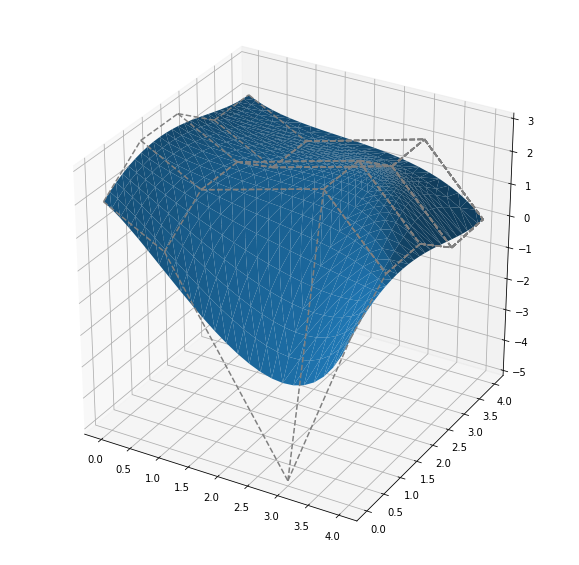

In [3]:

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_trisurf(X, Y, Z)
common.bfs(P, ax)
plt.show()

## Бикубические B-сплайновые поверхности 

### Определение


По заданному множеству вершин $\{P_{ij}\}, 0 \le i \le 3, 0 \le j \le 3$ **бикубическая B-сплайновая поверхность** определяется следующим уравнением: $\vec{R}\left(u,v\right)=\sum\limits_{i=0}^3 \sum\limits_{j=0}^3 n_i\left(u\right)n_j\left(v\right)\vec{P_{ij}}, 0 \le u, v \le 1$ , где функциональные элементы задаются следующим способом:

$n_0\left(u\right)=\dfrac{1}{6}\left(1-u\right)^3 \\
\\
n_1\left(u\right)=\dfrac{1}{6}\left(3u^3-6u^2+4\right) \\
\\
n_2\left(u\right)=\dfrac{1}{6}\left(-3u^3+3u^2+3u+1\right) \\
\\
n_3\left(u\right)=\dfrac{u^3}{6}$.


В матричной записи (см. матричную запись поверхности Безье) матрица $M = \dfrac{1}{6}\begin{bmatrix}
    1 & -3 & -3 & -1 \\
    4 & 0 & -6 & 3 \\
    1 & 3 & 3 & -3 \\
    0 & 0 & 0 & 1
\end{bmatrix}$.



Одним из отличий от поверхности Безье является то, что в общем случае ни одна из точек опорного массива не принадлежит поверхности. И это не является преимуществом по отношению к поверхности Безье $-$ ведь получается, что B-сплайновая поверхность хуже "повторяет" опорную, в чем можно убедиться в конце параграфа в визуализации. Но у такого рода поверхностей есть некоторое преимущество, описанное в следующем параграфе.

## Составные бикубические B-сплайновые поверхности

**Составной бикубической B-сплайновой поверхностью** называется поверхность, построенная на массиве точек $\{P_{ij}\}, 0 \le i \le n, 0 \le j \le m$ следующим образом:
зададим поверхность следующим уравнением $\vec{R^{\left(i,j\right)}}\left(u,v\right)=\sum\limits_{k=0}^3 \sum\limits_{l=0}^3 n_k\left(u\right)n_l\left(v\right)\vec{P}_{i-1+k, j-1+k}, 0 \le u, v \le 1, 1 \le i \le n - 2, 1 \le j \le m - 2$, 

$S^{\left(i,j\right)}  -$ поверхность, заданная предыдущим уравнением. То есть поверхность $S^{(i,j)}$ строится на массиве точек $P_{l,k}, i-1\le l \le i+2, j-1 \le k \le j+2$ (обратите внимание, в общем случае одна точка участвует в построении 16 поверхностей). Тогда составная поверхность будет состоять из $\left(n-2\right)\left(m-2\right)$ элементарных поверхностей $S^{\left(i,j\right)}$, то есть $S=\cup_{i=1}^{n-2}\cup_{j=1}^{m-2}S^{\left(i,j\right)}$.

### Сравнение с составной поверхностью Безье

Основные свои свойства составная поверхность наследует от элементарной B-сплайновой. Вот некоторые свойства, отличающие составные поверхности Безье и B-сплайновую
* При изменении одной точки необходимо пересчитать одну поверхность Безье и 16 B-сплайновых
* Поверхность Безье лучше "повторяет" опорный граф, так как проходит через угловые точки опорных массивов элементарных поверхностей.
* B-сплайновая поверхность в общем случае $C^2$-гладкая.

Последнее свойство является большим преимуществом составной B-сплайновой над Безье. 

Докажем, что действительно B-сплайновая поверхность $C^2$-гладкая.
<img src="img/b_spine.png" style="width: 400px; float: right" />

**Лемма 1**
>Составная бикубическая B-сплайновая поверхность принадлежит классу $C^0$

$\triangleright$
<div style="padding-left:40px">
Будем рассматривать граничащие поверхности $S^{\left(i,j\right)}$ и $S^{\left(i,j+1\right)}$. Докажем, что $\vec{R^{\left(i,j\right)}}\left(u,1\right)=\vec{R^{\left(i,j+1\right)}}\left(u,0\right)$.

$\vec{R^{\left(i,j+1\right)}}\left(u,0\right)=\vec{R^{\left(i,j\right)}}\left(u,1\right)=\sum\limits_{k=0}^3 n_k\left(u\right)\dfrac{1}{6}\left(\vec{P_{kj}}+4\vec{P_{k\left(j+1\right)}}+\vec{P_{k\left(j+2\right)}}\right)$ (расписано по определению)

</div>
$\triangleleft$

**Лемма 2**
>Составная бикубическая B-сплайновая поверхность принадлежит классу $C^1$

$\triangleright$
<div style="padding-left:40px">
Производные по первому аргументу рассматривать не имеет смысла, они, очевидно, равны. Рассмотрим производные по второму аргументу. Для начала запишем производные функциональных коэффициентов.

$n_0\left(u\right)'=-\dfrac{1}{2}\left(1-u\right)^2 \\
\\
n_1\left(u\right)'=\dfrac{1}{6}\left(9u^2-12u\right) \\
\\
n_2\left(u\right)'=\dfrac{1}{6}\left(-9u^2+6u+3\right) \\
\\
n_3\left(u\right)'=\dfrac{u^2}{2}$.

Теперь 
$\vec{R^{\left(i,j+1\right)}}\left(u,0\right)'_v=\vec{R^{\left(i,j\right)}}\left(u,1\right)'_v=\sum\limits_{k=0}^3 n_k\left(u\right)\dfrac{1}{2}\left(\vec{P}_{k\left(j+1\right)}-\vec{P}_{k\left(j-1\right)}\right)$

</div>
$\triangleleft$

**Лемма 3**
>Составная бикубическая B-сплайновая поверхность принадлежит классу $C^2$

$\triangleright$
<div style="padding-left:40px">
По аналогии с предыдущей теоремой распишем сначала производные, а потом убедимся, что производные на стыке поверхностей равны.

$n_0\left(u\right)''=1-u \\
\\
n_1\left(u\right)''=3u-2 \\
\\
n_2\left(u\right)''=-3u^2+1 \\
\\
n_3\left(u\right)''=u$.

$\vec{R^{\left(i,j+1\right)}}\left(u,0\right)''_{vv}=\vec{R^{\left(i,j\right)}}\left(u,1\right)''_{vv}=\sum\limits_{k=0}^3 n_k\left(u\right)\left(\vec{P}_{kj}-2\vec{P}_{i\left(j+1\right)}+\vec{P}_{i\left(j+2\right)}\right)$

</div>
$\triangleleft$

Таким образом, если сравнивать составные поверхности Безье и B-сплайновые, получается, что первые лучше приближают опорный массив, а вторые являются гладкими.

### Визуализация

In [4]:
func_coef = [
    lambda u: 1 / 6 * (1 - u) ** 3,
    lambda u: 1 / 6 * (3 * u ** 3 - 6 * u ** 2 + 4),
    lambda u: 1 / 6 * (-3 * u ** 3 + 3 * u ** 2 + 3 * u + 1),
    lambda u: 1 / 6 * u ** 3]

def n_coef(i, n, u):
    return func_coef[i](u)


def b_spine_surface(points, ax, uTimes=15, vTimes=15):
    n = len(points)
    m = len(points[0])
    U = np.linspace(0, 1, uTimes)
    V = np.linspace(0, 1, vTimes)
    for i in range(1, n - 2):
        for j in range(1, m - 2):
            curr_points = [points[i - 1][j - 1:j + 3], points[i][j - 1:j + 3], points[i + 1][j - 1:j + 3],
                           points[i + 2][j - 1:j + 3]]
            [X, Y, Z] = common.common_spline(curr_points, np.ones((n,m)), U, V, n_coef)
            ax.plot_trisurf(X, Y, Z)


P_B = [[(0, 0, 2), (0, 1, 3), (0, 2, 3), (0, 3, 2), (0, 4, -5), (0, 5, 0)],
     [(1, 0, 1), (1, 1, 2), (1, 2, 2), (1, 3, 1), (1, 4, -5), (1, 5, 0)],
     [(3, 0, 2), (3, 1, 3), (3, 2, 3), (3, 3, 2), (3, 4, -5), (3, 5, 2)],
     [(4, 0, 0), (4, 1, 1), (4, 2, 1), (4, 3, 0), (4, 4, -5), (4, 5, -3)],
     [(5, 0, 0), (5, 1, 1), (5, 2, 1), (5, 3, 0), (5, 4, -5), (5, 5, -5)],
     [(7, 0, 0), (7, 1, 4), (8, 2, -1), (7, 3, 0), (7, 4, -2), (7, 5, 0)]]

xs = [p[0] for ps in P_B for p in ps]
ys = [p[1] for ps in P_B for p in ps]
zs = [p[1] for ps in P_B for p in ps]


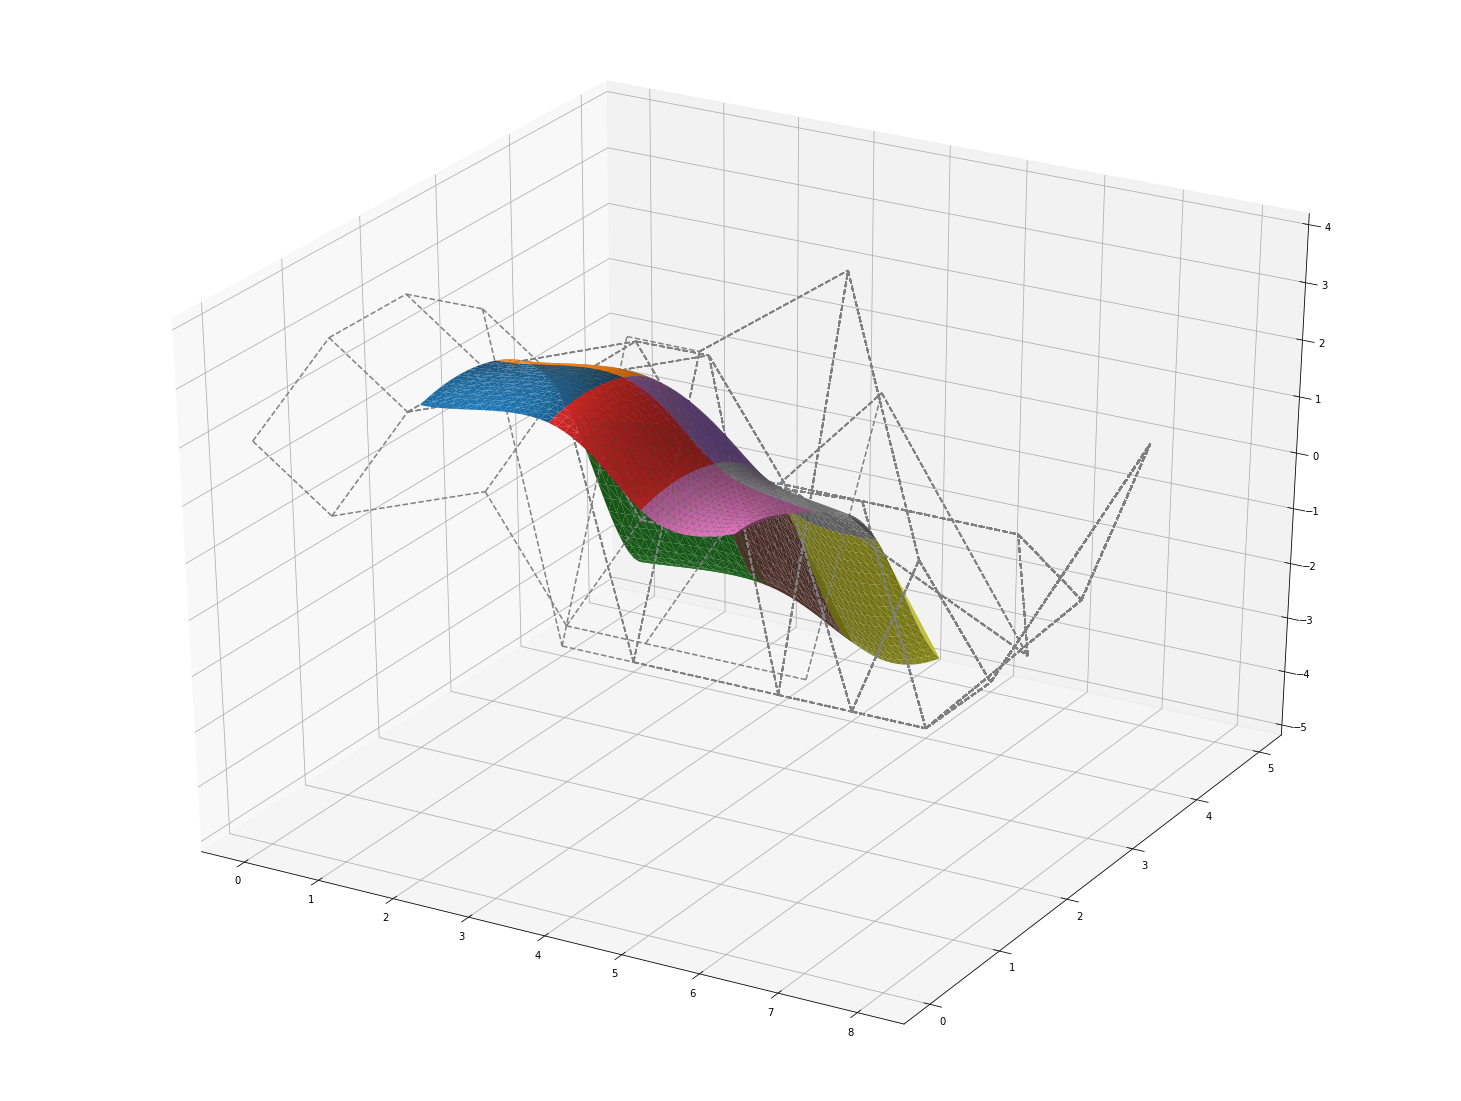

In [5]:
fig = plt.figure(figsize=(20, 15))
ax = Axes3D(fig)
ans = b_spine_surface(P_B, ax)
common.bfs(P_B, ax)
plt.show()